In [1]:
# my-login: zhang963
# partner-login: slchan2

In [2]:
import pandas as pd
from pandas import Series, DataFrame
import requests
import sqlite3
conn = sqlite3.connect('countries.db')
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import json



In [3]:
#q1
df_country = pd.read_json("https://tyler.caraza-harter.com/cs301/fall18/data/countries.json")
df_country['population'].sum()

6279556636

In [4]:
#q2
capitals = requests.get('https://tyler.caraza-harter.com/cs301/fall18/data/capitals.txt')
capital_list = capitals.text.split('\n')
capital= capital_list[0]
capital

'https://tyler.caraza-harter.com/cs301/fall18/data/capitals/ElSalvador.json'

In [5]:
#q3
newlist = []
for url in capital_list:
    result = requests.get(url).json()
    cap = result['capital']
    cou = result['country']
    lat = result['latitude']
    lon = result['longitude']
    newlist.append([cap,cou,lat,lon])

df_capital = pd.DataFrame(newlist,columns=['capital', 'country','latitude','longitude'])
for index,row in df_capital.iterrows():
    if row['country'] == 'China':
        capital_name = row['capital']
        break
capital_name

'Beijing'

In [6]:
#q4
df_capital=df_capital.sort_values(by=['latitude'])
ms=df_capital.head(5)
json.dumps(ms['country'].tolist())

'["New Zealand", "Australia", "Uruguay", "Argentina", "Chile"]'

In [7]:
#q5
df_capital = df_capital.sort_values(by=['latitude'],ascending=False)
mn=df_capital.head(3)
json.dumps(mn['country'].tolist())

'["Iceland", "Finland", "Norway"]'

In [8]:
#q6
df_country.describe()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,net-migration,population
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,7.285332e+05,22.536114,10.833657,9.654971,9781.714286,38.052743,0.123314,3.588318e+07
std,2.005565e+06,11.287090,38.245751,5.187216,10612.928974,35.369320,4.466356,1.333418e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,-13.920000,7.502000e+03
25%,2.779000e+04,12.635000,0.090000,6.075000,1900.000000,8.550000,-0.905000,2.033239e+06
50%,1.431000e+05,20.340000,0.440000,8.230000,5100.000000,24.180000,0.000000,7.523934e+06
75%,5.209850e+05,30.200000,3.150000,11.965000,14450.000000,62.155000,0.770000,2.272283e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,23.060000,1.313974e+09


In [9]:
#q7
df_country['literacy'] = df_country['literacy'].str.replace(",",".").astype('float64')
df_country['phones'] = df_country['phones'].str.replace(",", ".").astype('float64')
df_country.describe()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
count,1.750000e+02,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,1.750000e+02
mean,7.285332e+05,22.536114,10.833657,9.654971,9781.714286,38.052743,82.182286,0.123314,214.621143,3.588318e+07
std,2.005565e+06,11.287090,38.245751,5.187216,10612.928974,35.369320,20.086897,4.466356,218.613971,1.333418e+08
min,2.000000e+00,8.250000,0.000000,2.410000,500.000000,2.290000,17.600000,-13.920000,1.300000,7.502000e+03
25%,2.779000e+04,12.635000,0.090000,6.075000,1900.000000,8.550000,69.950000,-0.905000,31.300000,2.033239e+06
50%,1.431000e+05,20.340000,0.440000,8.230000,5100.000000,24.180000,92.000000,0.000000,140.100000,7.523934e+06
75%,5.209850e+05,30.200000,3.150000,11.965000,14450.000000,62.155000,98.000000,0.770000,329.700000,2.272283e+07
max,1.707520e+07,50.730000,331.660000,29.740000,55100.000000,163.070000,100.000000,23.060000,1035.600000,1.313974e+09


In [10]:
#q8
newdf = df_country[(df_country.continent=='Europe') & ( df_country.coastline == 0.0)].sort_values('area',ascending=False)
newdf.iat[0,4]

'Belarus'

In [11]:
#q9
newdf = df_country[(df_country.continent == 'Africa') & (df_country.coastline == 0.0)].sort_values('area', ascending=False)
newdf.iat[0, 4]

'Chad'

In [12]:
#q10
newdf = df_country[(df_country.continent == 'South America') & (df_country.coastline == 0.0)].sort_values('area', ascending=False)
newdf.iat[0, 4]

'Bolivia'

In [13]:
def Haversine(lon1, lat1, lon2, lat2):
    from math import radians, cos, sin, asin, sqrt
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * asin(sqrt(a))
    r = 3956
    return c * r

In [14]:
#q11
Haversine(-89.411893,43.070231,-89.384113,43.074645,)

1.433899492072933

In [15]:
#q12
lon1 = df_capital.set_index('country').loc['India'].longitude
lat1 = df_capital.set_index('country').loc['India'].latitude
lon2 = df_capital.set_index('country').loc['Brazil'].longitude
lat2 = df_capital.set_index('country').loc['Brazil'].latitude
Haversine(lon1,lat1,lon2,lat2)

8840.574141306946

In [16]:
#q13
df_target = df_country[df_country.continent=='South America']
countries = []
for index,row in df_target.iterrows():
    countries.append(row['country'])dist=[]
for i in range(len(countries)):
    country1 = countries[i]
    temp = []
    lon1 = df_capital.set_index('country').loc[country1].longitude
    lat1 = df_capital.set_index('country').loc[country1].latitude
    for j in range(len(countries)):
        country2 = countries[j]
        lon2 = df_capital.set_index('country').loc[country2].longitude
        lat2 = df_capital.set_index('country').loc[country2].latitude
        if i==j:
            temp.append(None)
        else:
            temp.append(Haversine(lon1,lat1,lon2,lat2))
    dist.append(temp)

df_dist =pd.DataFrame(dist,index = countries,columns=countries)
df_dist

,Chile,Guyana,Colombia,Suriname,Brazil,Bolivia,Venezuela,Argentina,Peru,Ecuador,Uruguay,Paraguay
Chile,NaN,2897.553095,2636.644599,2895.810776,1869.737031,1180.741903,3043.657689,690.784168,1531.480189,2350.207788,833.403262,963.635535
Guyana,2897.553095,NaN,1105.066312,215.336336,1709.071018,1747.772670,646.969843,2857.520462,1837.860149,1483.193753,2878.638295,2214.288286
Colombia,2636.644599,1105.066312,NaN,1303.405134,2275.516286,1512.119255,639.361118,2885.355610,1167.505359,451.004119,2962.230943,2337.615967
Suriname,2895.810776,215.336336,1303.405134,NaN,1572.674233,1778.772975,861.456786,2799.886429,1944.750017,1661.699022,2809.744412,2153.855447
Brazil,1869.737031,1709.071018,2275.516286,1572.674233,NaN,1342.297074,2228.690680,1459.139733,1967.770515,2344.584922,1412.096335,908.185709
Bolivia,1180.741903,1747.772670,1512.119255,1778.772975,1342.297074,NaN,1865.131181,1379.455702,669.926372,1326.758656,1467.253638,906.799256
Venezuela,3043.657689,646.969843,639.361118,861.456786,2228.690680,1865.131181,NaN,3157.624051,1705.418003,1088.064118,3207.352176,2544.799572
Argentina,690.784168,2857.520462,2885.355610,2799.886429,1459.139733,1379.455702,3157.624051,NaN,1936.465790,2696.149591,143.069943,646.036442
Peru,1531.480189,1837.860149,1167.505359,1944.750017,1967.770515,669.926372,1705.418003,1936.465790,NaN,823.054491,2046.571589,1558.635236
Ecuador,2350.207788,1483.193753,451.004119,1661.699022,2344.584922,1326.758656,1088.064118,2696.149591,823.054491,NaN,2791.196721,2218.650964


In [17]:
#q14
df_dist.mean(0,skipna = True).sort_values().index[0]

'Bolivia'

In [18]:
#q15
ss_idx = df_dist.idxmin(skipna = True)
ret = []
ss_val = df_dist.min(skipna = True)
for i in range(len(ss_idx.keys())):
    index = ss_idx[i]
    value = ss_val[i]
    ret.append([index,value])
df_nearest = pd.DataFrame(ret,columns=['nearest','distance'], index=ss_idx.keys())
df_nearest

,nearest,distance
Chile,Argentina,690.784168
Guyana,Suriname,215.336336
Colombia,Ecuador,451.004119
Suriname,Guyana,215.336336
Brazil,Paraguay,908.185709
Bolivia,Peru,669.926372
Venezuela,Colombia,639.361118
Argentina,Uruguay,143.069943
Peru,Bolivia,669.926372
Ecuador,Colombia,451.004119


In [19]:
df_country.to_sql("countries_table", conn, if_exists="replace", index=False)

In [20]:
#q16
result_df = pd.read_sql("select country,population from countries_table where continent='North America' and population <=100000 order by population", conn)
result_df

,country,population
0,Anguilla,13477
1,Cayman Islands,45436
2,Bermuda,65773
3,Dominica,68910
4,Aruba,71891
5,Grenada,89703


In [21]:
#q17
result_df = pd.read_sql("select country,population from countries_table where continent='Europe' order by population desc", conn)
result_df.head(3)

,country,population
0,Russia,142893540
1,Germany,82422299
2,Turkey,70413958


In [22]:
#q18
df_pop = pd.read_sql("select continent, avg(population) as avg_pop from countries_table group by 1 order by avg_pop desc", conn)
df_pop

,continent,avg_pop
0,Asia,9.841850e+07
1,Central America,4.351613e+07
2,South America,3.128681e+07
3,Europe,1.931838e+07
4,Africa,1.718654e+07
5,North America,2.797245e+06
6,Australia,2.680252e+06


In [23]:
#q19
df_num_country = pd.read_sql("select continent, count(*) as  num_countries from countries_table group by 1 order by num_countries", conn)
df_num_country

,continent,num_countries
0,Central America,11
1,Australia,12
2,South America,12
3,North America,13
4,Asia,38
5,Europe,41
6,Africa,48


In [24]:
#q20
result_df = pd.read_sql('select continent,avg("death-rate") as avg_death_rate from countries_table group by 1 HAVING avg_death_rate >10', conn)
result_df

,continent,avg_death_rate
0,Africa,14.504792
1,Europe,10.258537


Text(0,0.5,'avg population per country(millions)')

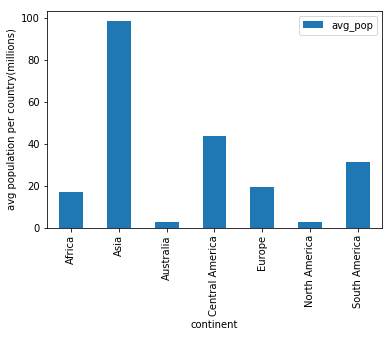

In [25]:
#q21
df_pop_21 = pd.read_sql("select continent, avg(population) as avg_pop from countries_table group by 1 order by continent,population", conn)
df_pop_21.set_index(["continent"], inplace=True)
df_pop_21['avg_pop'] = df_pop_21['avg_pop'].map(lambda x: x /1000000)
df_pop_21.plot(kind='bar')
plt.ylabel("avg population per country(millions)")

Text(0,0.5,'number of countries')

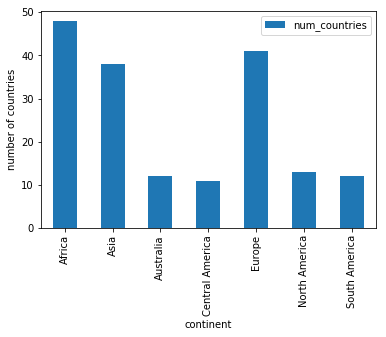

In [26]:
#q22
df_num_country_22 = pd.read_sql("select continent, count(*) as  num_countries from countries_table group by 1 order by continent", conn)
df_num_country_22.set_index(["continent"], inplace=True)
df_num_country_22.plot(kind='bar')
plt.ylabel("number of countries")

Text(0,0.5,'dustance to nearest neighbour (miles)')

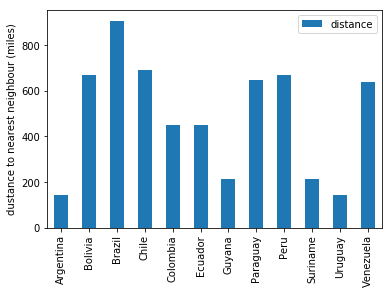

In [27]:
#q23
del df_nearest['nearest']
newdf = df_nearest.sort_index()

#df.set_index(["continent"], inplace=True)
newdf.plot(kind='bar')
plt.ylabel('dustance to nearest neighbour (miles)')

Text(0,0.5,'population (millions)')

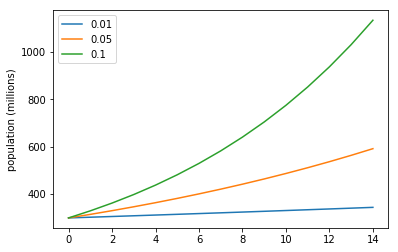

In [28]:
#q24
usa_df = df_country[df_country.country=='United States']
pop_now = usa_df['population'].tolist()[0]
furture_list = []
for i in range(15):
    temp = [pop_now*((1+0.01)**i)/1000000, pop_now * ((1 + 0.05) ** i)/1000000, pop_now * ((1 + 0.1) ** i)/1000000]
    furture_list.append(temp)

newdf = pd.DataFrame(furture_list,index=range(15),columns=[0.01,0.05,0.1])

newdf.plot(kind='line')
plt.ylabel('population (millions)')

In [29]:
#q25
df_country.corr()

,area,birth-rate,coastline,death-rate,gdp-per-capita,infant-mortality,literacy,net-migration,phones,population
area,1.000000,-0.108139,-0.098288,-0.002130,0.082266,-0.063257,0.066041,0.065235,0.109631,0.462874
birth-rate,-0.108139,1.000000,-0.122044,0.400378,-0.639507,0.868727,-0.792272,-0.086181,-0.731924,-0.063382
coastline,-0.098288,-0.122044,1.000000,-0.120772,0.148445,-0.156597,0.136546,0.109484,0.289311,-0.070195
death-rate,-0.002130,0.400378,-0.120772,1.000000,-0.209958,0.627801,-0.343025,0.044947,-0.253893,-0.054619
gdp-per-capita,0.082266,-0.639507,0.148445,-0.209958,1.000000,-0.628262,0.517995,0.451700,0.879161,-0.041405
infant-mortality,-0.063257,0.868727,-0.156597,0.627801,-0.628262,1.000000,-0.760859,-0.033321,-0.689914,0.000589
literacy,0.066041,-0.792272,0.136546,-0.343025,0.517995,-0.760859,1.000000,0.001542,0.594322,-0.037325
net-migration,0.065235,-0.086181,0.109484,0.044947,0.451700,-0.033321,0.001542,1.000000,0.343883,-0.004488
phones,0.109631,-0.731924,0.289311,-0.253893,0.879161,-0.689914,0.594322,0.343883,1.000000,-0.006100
population,0.462874,-0.063382,-0.070195,-0.054619,-0.041405,0.000589,-0.037325,-0.004488,-0.006100,1.000000


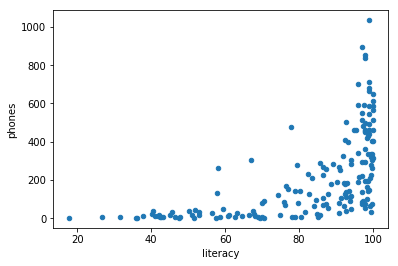

In [30]:
#q26
df_country.plot.scatter(x='literacy',y='phones')

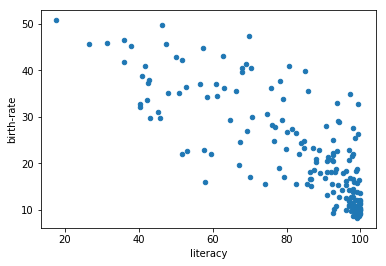

In [31]:
#q27
df_country.plot.scatter(x='literacy', y='birth-rate')

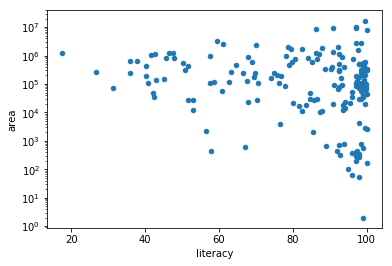

In [32]:
#q28
df_country.plot.scatter(x='literacy', y='area',logy=True)

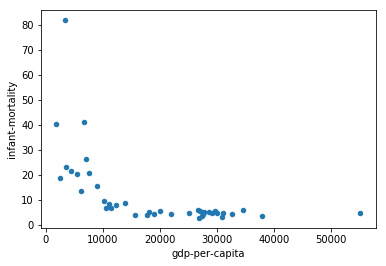

In [33]:
#q29
df_new= df_country[df_country.continent == 'Europe']
df_new.plot.scatter(x='gdp-per-capita', y='infant-mortality')

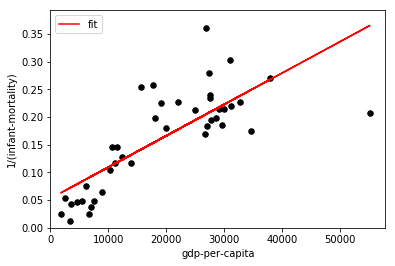

In [34]:
#q30
europe = df_country.loc[df_country.continent == 'Europe']
df_new_30 = Series(europe['gdp-per-capita'])
df = Series(europe['infant-mortality'].rdiv(1))

df_country= pd.DataFrame({'gdp-per-capita':df_new_30, '1/(infant-mortality)': df})
df_country["1"] = 1
res = np.linalg.lstsq(df_country[["gdp-per-capita", "1"]], df_country["1/(infant-mortality)"], rcond=None)
# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0]  # coefficients is (m,n)
m = coefficients[0]  # slope
n = coefficients[1]  # intercept
ax = df_country.plot.scatter(x='gdp-per-capita', y='1/(infant-mortality)', c='black', s=30, xlim=0, ylim=0)

df_country["fit"] = df_new["gdp-per-capita"] * m + n
df_country.plot.line(x='gdp-per-capita', y='fit', c='red', ax=ax)
